In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from scipy.stats import norm, skewnorm
%matplotlib inline

<class 'list'> <class 'list'>


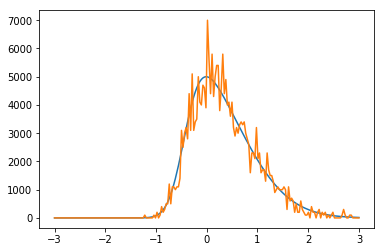

<class 'list'> <class 'list'>


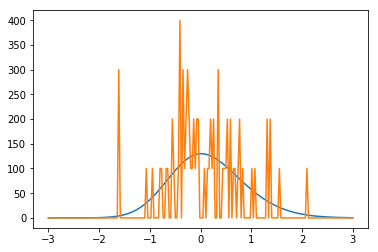

<class 'list'> <class 'list'>


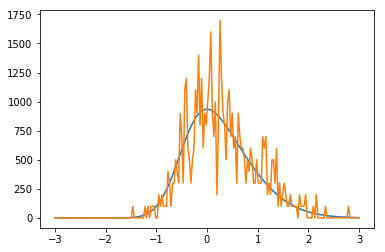

<class 'list'> <class 'list'>


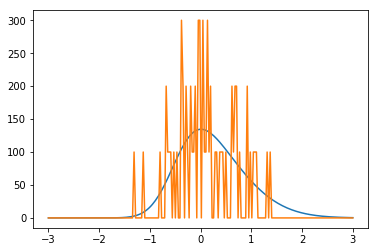

<class 'list'> <class 'list'>


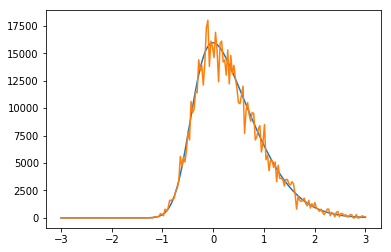

<class 'list'> <class 'list'>


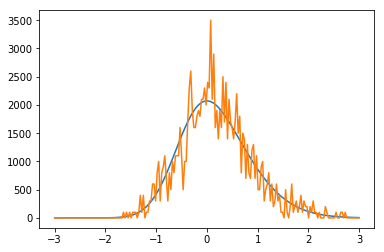

<class 'list'> <class 'list'>


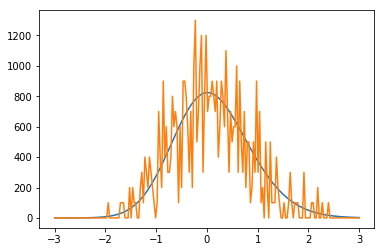

<class 'list'> <class 'list'>


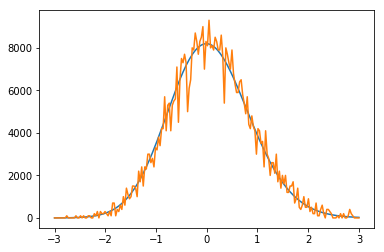

<class 'list'> <class 'list'>


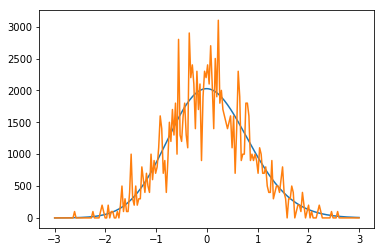

<class 'list'> <class 'list'>


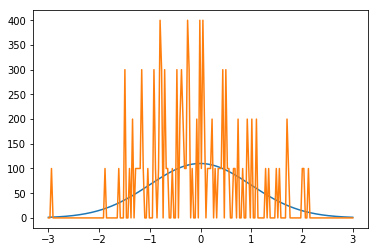

In [12]:
class peakmodel:
    @classmethod
    def spikenoise(cls, length, maxintensity):
        data = np.arange(length)
        print(data)
        return data
    @classmethod
    def peak(cls, maxcps, datapoints, dwelltime, skew = 0, sigma = 3, location = 0):
        location = 0
        scale = 1
        alpha = skew
#         delta = alpha / np.sqrt(1+alpha**2)
#         uz = np.sqrt(2/np.pi) * delta
#         sigmaz = np.sqrt(1.0-uz**2.0)
#         gamma = (4-np.pi)/2 * (delta*np.sqrt(2/np.pi))**3/(1-2*delta**2/np.pi)**(3/2)
#         moa = uz - (gamma * sigmaz / 2) - (np.sign(alpha))*np.exp(-2*np.pi/np.abs(alpha))
#         mode = location + scale * moa
#         _norm_ = skewnorm.pdf(x=mode, a=alpha, loc=location, scale=scale) # 標準正規分布の高さ

        times = np.linspace(-sigma, sigma, datapoints)                
        _refpeak_ = [skewnorm.pdf(x = time, a=alpha, loc=0, scale=scale) for time in times]
        _norm_ = np.max(_refpeak_)
        maxindex = np.argmax(_refpeak_)
        maxtime = times[maxindex]
        # refpeak = np.array(_refpeak_) * maxcps / _norm_
        refpeak = [skewnorm.pdf(x=time, a=alpha, loc= location - maxtime, scale=scale) * maxcps / _norm_ for time in times]
        # print('maxindex:', maxindex)
        # print('maxpos:', maxtime)
        samplepeak = [poisson(peak * dwelltime / 1000) * 1000 / dwelltime for peak in refpeak]
        return times, refpeak, samplepeak
        
# noise = baselinenoise()
# peakmodel.spikenoise(10, 1)
for i in np.arange(10):
    height = 2 + rand() * 3
    skw = rand() * 5
    height = 10**height
    times, refpeak, samplepeak = peakmodel.peak(maxcps = height, datapoints = 200, dwelltime = 10, skew=skw)
    print(type(refpeak), type(samplepeak))
    plt.plot(times, refpeak)
    plt.plot(times, samplepeak)
    plt.show()
